In [1]:
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt

In [25]:
model = keras.models.load_model(r'FaceMaskDetection_Using_cnn.h5')

In [26]:
model

In [27]:
a = (70,70,3)
b = [1,*a]
b

[1, 70, 70, 3]

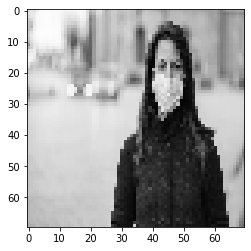

In [38]:
img_path = 'masked_person.jpg'

master_I= cv2.imread(img_path)
master_I = cv2.cvtColor(master_I,cv2.COLOR_BGR2RGB)
orig_image = cv2.cvtColor(master_I, cv2.COLOR_RGB2GRAY)
image = cv2.resize(orig_image,(70,70))
image = image.reshape((*image.shape,1)) # as tf.image.grayscale_to_rgb requires last dimension to be 1, see why reshape link
image = tf.convert_to_tensor(image)  # as tf.image.grayscale_to_rgb requires tensor for processing.
image = tf.image.grayscale_to_rgb(image).numpy()/255. # .numpy will convert dtype to numpy from tf
# we need to reshape image to [batch_size, row, col, channel] to feed it to model for prediction
final_image = image.reshape(1, *image.shape) #https://stackoverflow.com/questions/56874677/transform-3d-tensor-to-4d

plt.imshow(final_image[0])

In [39]:
final_image[0].shape

(70, 70, 3)

In [40]:
model.predict(final_image)

array([[0.3803011, 0.6196988]], dtype=float32)

In [41]:
is_mask = tf.math.argmax(model.predict(final_image),1).numpy()[0] # it gives the index value of maximum
is_mask

1

with mask


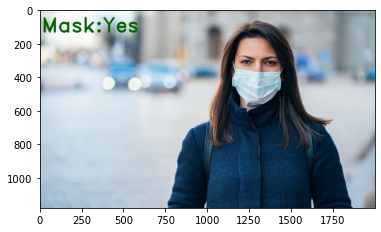

In [42]:
def mask(img):
    if is_mask:
        plt.imshow(cv2.putText(img,
                    'Mask:Yes', (10,130),
                    fontFace=cv2.FONT_HERSHEY_DUPLEX,
                    fontScale=4,
                    color=(0,100,0),thickness=7))
        print("with mask")
    else:
        plt.imshow(img)
        print("no mask")
        
mask(master_I)